In [2]:
import pandas as pd
import CococoNet_reader
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import Name_resolver
import tqdm as tq

In [3]:
def get_ncbi_clean_og2gene_for_species(
    species_1, og2genes_only_cococonet, ncbi_mapping
):

    species_1_name = Name_resolver.species_name_resolver(
        species_1, desired_type="common"
    )

    first_species_ortho_groups = og2genes_only_cococonet.loc[
        og2genes_only_cococonet["Species"] == species_1
    ]
    shared_orthogroups = first_species_ortho_groups["Orthogroup"].unique()

    list_of_orthogene_pds = []
    for orthogroup in tq.tqdm(
        shared_orthogroups, desc="inner_loop", position=0, leave=False
    ):
        species_1_genes = (
            first_species_ortho_groups["Gene"]
            .loc[first_species_ortho_groups["Orthogroup"] == orthogroup]
            .to_list()
        )
        all_gene_combos = species_1_genes
        current_orthogroup_pd = pd.DataFrame(
            columns=[f"{species_1_name} OrthoGene"], data=all_gene_combos
        )
        current_orthogroup_pd["Orthogroup"] = orthogroup
        list_of_orthogene_pds.append(current_orthogroup_pd)

    final_species_lineup = pd.concat(list_of_orthogene_pds)
    ncbi_added_once = final_species_lineup.merge(
        right=ncbi_mapping[["Orthodb Gene", "Symbol"]],
        right_on="Orthodb Gene",
        left_on=f"{species_1_name} OrthoGene",
    )
    ncbi_added_once_clean = ncbi_added_once.drop(columns="Orthodb Gene")
    return ncbi_added_once_clean

In [4]:
og_groups = pd.read_csv(
    "/data/passala/OrthoDB_data/NCBI_data/merged_ncbi_to_orthodb_fixed_non_genesymbol_updated_poplar.csv"
)
og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,67026at3193,15368_0:000000,15368,3193.0,15368_0:000000,LOC100829170
1,7376at3193,15368_0:000001,15368,3193.0,15368_0:000001,LOC100840094
2,325723at3193,15368_0:000002,15368,3193.0,15368_0:000002,LOC100841678
3,117946at3193,15368_0:000003,15368,3193.0,15368_0:000003,LOC100844153
4,658893at3193,15368_0:000004,15368,3193.0,15368_0:000004,LOC100841477
...,...,...,...,...,...,...
615300,68168at3193,4577_0:0085a4,4577,3193.0,4577_0:0085a4,ZemaCp159
615301,868182at3193,4577_0:0085a5,4577,3193.0,4577_0:0085a5,rps19
615302,125785at3193,4577_0:0085a6,4577,3193.0,4577_0:0085a6,ZemaCp081
615303,866429at3193,4577_0:0085a7,4577,3193.0,4577_0:0085a7,petD


In [5]:
# og_groups = pd.read_csv(
#     "/data/passala/OrthoDB_data/NCBI_data/og_2_Genes_with_ncbi_symbol.csv"
# )
# og_groups

In [6]:
og_groups.loc[og_groups['Species'] == 3694]

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
69259,886815at3193,3694_0:000000,3694,3193.0,3694_0:000000,LOC7478672
69260,672493at3193,3694_0:000001,3694,3193.0,3694_0:000001,LOC7467060
69261,68793at3193,3694_0:000002,3694,3193.0,3694_0:000002,LOC7490712
69262,868336at3193,3694_0:000003,3694,3193.0,3694_0:000003,LOC18094411
69263,82261at3193,3694_0:000004,3694,3193.0,3694_0:000004,LOC7485683
...,...,...,...,...,...,...
97751,867634at3193,3694_0:007b69,3694,3193.0,3694_0:007b69,ndhC
97752,283564at3193,3694_0:007b6a,3694,3193.0,3694_0:007b6a,ndhB
97753,866726at3193,3694_0:007b6b,3694,3193.0,3694_0:007b6b,ndhH
97754,547686at3193,3694_0:007b6c,3694,3193.0,3694_0:007b6c,psbE


In [7]:
# ncbi_mapping = pd.read_csv(
#     "/data/passala/OrthoDB_data/NCBI_data/merged_ncbi_to_orthodb_fixed_non_genesymbol.csv"
# )

In [8]:
ncbi_mapping = pd.read_csv('/data/passala/OrthoDB_data/NCBI_data/merged_ncbi_to_orthodb_fixed_non_genesymbol_updated_poplar.csv')

In [9]:
ncbi_mapping

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,67026at3193,15368_0:000000,15368,3193.0,15368_0:000000,LOC100829170
1,7376at3193,15368_0:000001,15368,3193.0,15368_0:000001,LOC100840094
2,325723at3193,15368_0:000002,15368,3193.0,15368_0:000002,LOC100841678
3,117946at3193,15368_0:000003,15368,3193.0,15368_0:000003,LOC100844153
4,658893at3193,15368_0:000004,15368,3193.0,15368_0:000004,LOC100841477
...,...,...,...,...,...,...
615300,68168at3193,4577_0:0085a4,4577,3193.0,4577_0:0085a4,ZemaCp159
615301,868182at3193,4577_0:0085a5,4577,3193.0,4577_0:0085a5,rps19
615302,125785at3193,4577_0:0085a6,4577,3193.0,4577_0:0085a6,ZemaCp081
615303,866429at3193,4577_0:0085a7,4577,3193.0,4577_0:0085a7,petD


In [11]:
soybean_og = get_ncbi_clean_og2gene_for_species(
    3847  , og_groups, ncbi_mapping=ncbi_mapping
)

In [13]:
brome_og = get_ncbi_clean_og2gene_for_species(
    15368 , og_groups, ncbi_mapping=ncbi_mapping
)

In [14]:
soybean_og.tail(110)

,soybean OrthoGene,Orthogroup,Symbol
44414,3847_0:00b70e,866624at3193,psbB
44415,3847_0:00b70f,110878at3193,rpl23
44416,3847_0:00b737,110878at3193,rpl23
44417,3847_0:00b710,873378at3193,psbM
44418,3847_0:00b711,752729at3193,rbcL
...,...,...,...
44519,3847_0:00b78b,898071at3193,orf105a
44520,3847_0:00b78e,125256at3193,matR
44521,3847_0:00b78f,892295at3193,orf136a
44522,3847_0:00b791,417238at3193,nad9


In [15]:
brome_og

,brome OrthoGene,Orthogroup,Symbol
0,15368_0:000000,67026at3193,LOC100829170
1,15368_0:0016c0,67026at3193,LOC100842271
2,15368_0:000001,7376at3193,LOC100840094
3,15368_0:000002,325723at3193,LOC100841678
4,15368_0:005c27,325723at3193,LOC100838354
...,...,...,...
24037,15368_0:006380,25181at3193,cemA
24038,15368_0:006381,728021at3193,psbT
24039,15368_0:006383,747302at3193,petL
24040,15368_0:006384,547686at3193,psbE


In [16]:
list_of_non_single_gene_groups_soybean = pd.Series(soybean_og['Orthogroup'].value_counts().loc[soybean_og['Orthogroup'].value_counts() >1])

In [17]:
list_of_non_single_gene_groups_brome = pd.Series(brome_og['Orthogroup'].value_counts().loc[brome_og['Orthogroup'].value_counts() >1])

In [18]:
list_of_non_single_gene_groups_brome

Orthogroup
60170at3193     28
28502at3193     22
74860at3193     21
887174at3193    18
47836at3193     18
                ..
60552at3193      2
111972at3193     2
792639at3193     2
66392at3193      2
878172at3193     2
Name: count, Length: 4890, dtype: int64

In [19]:
list_of_non_single_gene_groups_soybean

Orthogroup
886969at3193    63
889521at3193    54
227973at3193    52
784291at3193    46
866087at3193    43
                ..
28159at3193      2
676631at3193     2
585793at3193     2
583585at3193     2
890017at3193     2
Name: count, Length: 10404, dtype: int64

In [20]:
soybean_og = soybean_og.loc[soybean_og['Orthogroup'].isin(list_of_non_single_gene_groups_soybean.index)]

In [21]:
brome_og = brome_og.loc[brome_og['Orthogroup'].isin(list_of_non_single_gene_groups_brome.index)]

In [22]:
brome_og

,brome OrthoGene,Orthogroup,Symbol
0,15368_0:000000,67026at3193,LOC100829170
1,15368_0:0016c0,67026at3193,LOC100842271
3,15368_0:000002,325723at3193,LOC100841678
4,15368_0:005c27,325723at3193,LOC100838354
5,15368_0:000003,117946at3193,LOC100844153
...,...,...,...
24006,15368_0:006379,868182at3193,rps19
24015,15368_0:006367,110878at3193,rpl23
24016,15368_0:00636f,110878at3193,rpl23
24018,15368_0:006369,127055at3193,ndhB


In [23]:
brome_csv = pd.read_csv('/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Ortho_vs_gene_files/brome_reads.csv', index_col = 0)
brome_csv = brome_csv.T
brome_csv

,brome Cold Rep 1,brome Cold Rep 2,brome Cold Rep 3,brome Hot Rep 1,brome Hot Rep 2,brome Hot Rep 3
LOC104581917,0,0,0,0,0,0
LOC100827252,0,0,0,1,0,0
LOC100827520,143,202,137,77,139,88
LOC100834957,1,6,6,24,34,48
LOC100826906,36,30,47,10,11,11
...,...,...,...,...,...,...
BrdiC_t037,0,0,0,0,0,0
BrdiC_p085,0,0,0,0,0,0
BrdiC_p086,0,0,0,0,0,0
BrdiC_t038,0,0,0,0,0,0


In [24]:
dict_version = brome_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
brome_csv = brome_csv.groupby(by = true_dict).mean()

In [25]:
brome_csv

,brome Cold Rep 1,brome Cold Rep 2,brome Cold Rep 3,brome Hot Rep 1,brome Hot Rep 2,brome Hot Rep 3
100190at3193,194.500000,125.500000,220.500000,18.500000,36.00,43.500000
10038at3193,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1004at3193,54.000000,41.000000,72.000000,16.500000,28.00,21.000000
10051at3193,9.833333,8.833333,14.833333,4.666667,6.50,5.166667
10077at3193,1.000000,1.333333,0.333333,0.000000,0.00,0.000000
...,...,...,...,...,...,...
9842at3193,30.000000,32.500000,26.000000,27.000000,27.00,39.000000
98955at3193,542.600000,435.200000,605.800000,354.800000,496.80,607.000000
99208at3193,82.000000,68.000000,94.000000,51.500000,62.50,59.000000
9942at3193,1743.000000,1494.000000,1852.500000,659.750000,991.25,1180.500000


In [26]:
brome_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Cold", "Cold", "Cold", "Hot", "Hot", "Hot"],
    index=[
        "brome Cold Rep 1",
        "brome Cold Rep 2",
        "brome Cold Rep 3",
        "brome Hot Rep 1",
        "brome Hot Rep 2",
        "brome Hot Rep 3",
    ],
)

In [27]:
combined_soybean = pd.read_csv("/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Ortho_vs_gene_files/soybean_reads.csv", index_col = 0)
combined_soybean = combined_soybean.T
combined_soybean


,soybean Hot Rep 1,soybean Hot Rep 2,soybean Hot Rep 3,soybean Cold Rep 1,soybean Cold Rep 2,soybean Cold Rep 3
GLYMA_01G000322,21,16,35,16,18,29
GLYMA_01G000400,449,431,528,467,497,500
GLYMA_01G000600,428,355,451,284,335,370
GLYMA_01G000750,0,0,0,0,0,0
GLYMA_01G000900,901,736,996,430,673,658
...,...,...,...,...,...,...
GLYMA_20G249700,1988,1747,2243,1393,1345,1512
GLYMA_20G249800,2653,2192,3305,5215,3390,4037
GLYMA_20G249900,203,204,216,294,234,274
GLYMA_20G250000,700,539,939,494,650,690


In [28]:
dict_version = soybean_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
combined_soybean = combined_soybean.groupby(by = true_dict).mean()
combined_soybean

,soybean Hot Rep 1,soybean Hot Rep 2,soybean Hot Rep 3,soybean Cold Rep 1,soybean Cold Rep 2,soybean Cold Rep 3
10009at3193,185.333333,211.333333,182.666667,175.333333,125.000000,148.666667
10092at3193,291.666667,264.666667,353.666667,183.000000,228.000000,250.333333
10147at3193,423.250000,300.250000,455.500000,439.000000,466.250000,501.750000
10228at3193,1848.000000,1587.000000,2177.000000,1084.000000,1549.000000,1708.000000
10488at3193,234.000000,197.000000,361.000000,239.000000,674.000000,733.000000
...,...,...,...,...,...,...
9828at3193,463.000000,387.333333,527.333333,325.333333,464.666667,424.666667
9836at3193,196.500000,200.500000,275.500000,277.000000,337.500000,313.000000
9877at3193,494.000000,414.000000,578.250000,355.250000,449.750000,581.000000
9919at3193,699.500000,582.500000,825.500000,155.500000,263.500000,244.000000


In [29]:
combined_soybean = combined_soybean.T
brome_csv = brome_csv.T

In [30]:
soybean_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Hot", "Hot", "Hot","Cold","Cold", "Cold", ],
    index=[
        "soybean Hot Rep 1",
        "soybean Hot Rep 2",
        "soybean Hot Rep 3",
        "soybean Cold Rep 1",
        "soybean Cold Rep 2",
        "soybean Cold Rep 3",
    ],
)

In [31]:
combined_soybean = combined_soybean.round(0)
brome_csv = brome_csv.round(0)

In [32]:
genes_to_keep_brome = brome_csv.columns[brome_csv.sum(axis=0) >= 100]
brome_csv = brome_csv[genes_to_keep_brome]
inference_brome = DefaultInference(n_cpus=30)
dds_brome = DeseqDataSet(
    counts=brome_csv,
    metadata=brome_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference_brome,
)
dds_brome.deseq2()
stat_res_brome = DeseqStats(dds_brome, inference=inference_brome)
stat_res_brome.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.37 seconds.

Fitting dispersion trend curve...
... done in 0.11 seconds.

Fitting MAP dispersions...
... done in 0.40 seconds.

Fitting LFCs...
... done in 0.42 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                 baseMean  log2FoldChange     lfcSE      stat        pvalue  \
100190at3193    89.080360       -1.806246  0.261942 -6.895606  5.363578e-12   
1004at3193      35.077482       -0.675373  0.359660 -1.877809  6.040733e-02   
10107at3193    159.952687       -0.115343  0.168293 -0.685371  4.931097e-01   
10358at3193    202.028267        1.474322  0.170092  8.667769  4.406680e-18   
104517at3193    22.882200       -1.457372  0.453082 -3.216574  1.297308e-03   
...                   ...             ...       ...       ...           ...   
9842at3193      31.303165        0.736382  0.379830  1.938714  5.253612e-02   
98955at3193    506.795968        0.544559  0.110866  4.911885  9.020483e-07   
99208at3193     68.665717        0.197943  0.258964  0.764366  4.446489e-01   
9942at3193    1246.474370       -0.194738  0.090321 -2.156068  3.107838e-02   
9959at3193    2547.342266       -0.916599  0.130658 -7.015264  2.295147e-12 

... done in 0.25 seconds.



In [33]:
genes_to_keep = combined_soybean.columns[combined_soybean.sum(axis=0) >= 100]
combined_soybean = combined_soybean[genes_to_keep]
inference = DefaultInference(n_cpus=30)
dds_soybean = DeseqDataSet(
    counts=combined_soybean,
    metadata=soybean_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds_soybean.deseq2()
stat_res_soybean = DeseqStats(dds_soybean, inference=inference)
stat_res_soybean.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.58 seconds.

Fitting dispersion trend curve...
... done in 0.36 seconds.

Fitting MAP dispersions...
... done in 0.69 seconds.

Fitting LFCs...
... done in 0.53 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                baseMean  log2FoldChange     lfcSE      stat        pvalue  \
10009at3193   173.000256        0.430426  0.242454  1.775288  7.585033e-02   
10092at3193   260.781062        0.519181  0.152998  3.393376  6.903678e-04   
10147at3193   426.832587       -0.208953  0.141672 -1.474906  1.402377e-01   
10228at3193  1646.869190        0.430478  0.156549  2.749803  5.963109e-03   
10488at3193   394.770119       -0.994054  0.353945 -2.808500  4.977288e-03   
...                  ...             ...       ...       ...           ...   
9828at3193    429.031629        0.235979  0.152430  1.548116  1.215944e-01   
9836at3193    264.174162       -0.414411  0.164656 -2.516825  1.184175e-02   
9877at3193    474.015423        0.159871  0.173605  0.920888  3.571087e-01   
9919at3193    461.925167        1.723904  0.188059  9.166842  4.870796e-20   
9942at3193   1017.050543        0.221496  0.194483  1.138896  2.547466e-01   

        

... done in 0.68 seconds.



In [34]:
full_results_soybean = stat_res_soybean.results_df
full_results_soybean
full_brome_results = stat_res_brome.results_df

In [35]:
full_results_soybean.to_csv('/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Ortho_vs_gene_files/soybean_ortho_trimmed_out_2_gene_families.csv')
full_brome_results.to_csv('/data/passala/Module_paper_data/Brome_soybean_flooding_stress/Ortho_vs_gene_files/brome_ortho_trimmed_out_2_gene_families.csv')


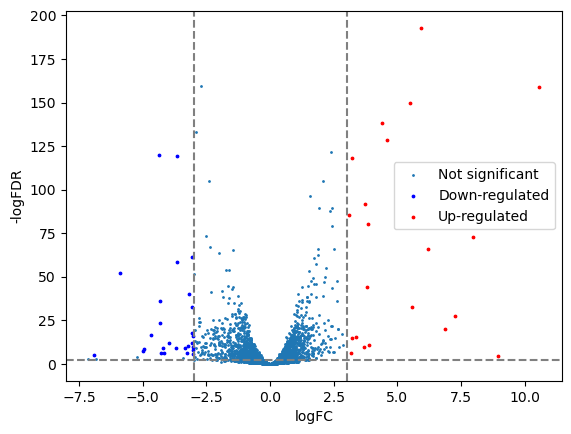

In [36]:
plt.scatter(
    x=full_brome_results["log2FoldChange"],
    y=full_brome_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down_brome = full_brome_results[
    (full_brome_results["log2FoldChange"] <= -3)
    & (full_brome_results["padj"] <= 0.0001)
]
up_brome = full_brome_results[
    (full_brome_results["log2FoldChange"] >= 3) & (full_brome_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down_brome["log2FoldChange"],
    y=down_brome["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up_brome["log2FoldChange"],
    y=up_brome["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

In [37]:
up_brome

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
11051at3193,19.547152,3.166862,0.599187,5.285264,1.255238e-07,5.664839e-07
122578at3193,296.012809,6.213118,0.354730,17.515062,1.099666e-68,1.767502e-66
139077at3193,120.613797,7.251185,0.636291,11.396020,4.376740e-30,1.793176e-28
139845at3193,178.655924,3.808341,0.265555,14.341073,1.211674e-46,1.012717e-44
190438at3193,1776.737757,3.113006,0.156118,19.940123,1.826139e-88,4.016546e-86
2073at3193,129.037794,5.551196,0.449619,12.346442,5.091352e-35,2.626760e-33
40961at3193,84.470199,3.207158,0.389683,8.230177,1.869368e-16,2.238421e-15
43702at3193,2745.817126,5.935614,0.198147,29.955641,3.715224e-197,1.552592e-193
467330at3193,13220.006929,4.394624,0.173351,25.351012,8.758515e-142,7.320367e-139
51673at3193,78.428826,6.881446,0.714116,9.636311,5.617010e-22,1.148193e-20


In [38]:
plt.scatter(
    x=full_results["log2FoldChange"],
    y=full_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down = full_results[
    (full_results["log2FoldChange"] <= -3) & (full_results["padj"] <= 0.0001)
]
up = full_results[
    (full_results["log2FoldChange"] >= 3) & (full_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down["log2FoldChange"],
    y=down["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up["log2FoldChange"],
    y=up["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

NameError: name 'full_results' is not defined

In [ ]:
up